In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [2]:
properties_2016 = pd.read_csv("properties_2016.csv")

properties_2016.shape
#(2985217, 58)
properties_2016.describe()
#53 columns are numerical



/Users/wenqian/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TypeError: 'Index' object is not callable

In [4]:
properties_2016

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [5]:
#numerical variable include
num_val = properties_2016.select_dtypes(include = ['float64','int64']).columns
#53

#categorical variable include
cat_val = properties_2016.select_dtypes(include = ['object']).columns
#len is 5
#cat_val
#Index([u'hashottuborspa', u'propertycountylandusecode', u'propertyzoningdesc',
 #      u'fireplaceflag', u'taxdelinquencyflag'],
 #     dtype='object')


na_all = properties_2016.isnull().sum()
#There are a number of features are NA
Counter(properties_2016.hashottuborspa)
Counter(properties_2016.propertycountylandusecode)
Counter(properties_2016.propertyzoningdesc)

Counter(properties_2016.fireplaceflag)

Counter(properties_2016.taxdelinquencyflag)

properties_2016[cat_val].isnull().sum() #only the second one does not have many NAs

###############################
train_2016 = pd.read_csv("train_2016.csv")



##############################
#train_prop is the merged dataset
train_prop = train_2016.merge(properties_2016, how = "inner", on = "parcelid")
train_prop.shape

na_train = train_prop.isnull().sum()

In [67]:
train_prop.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [116]:
colrename = {
            "parcelid":"Parcel_ID",
            "transactiondate": "tran_date", 
            "airconditioningtypeid":"AC_Type",
            "architecturalstyletypeid":"Arch_Type",
            "basementsqft":"Basement_Area",
            "bathroomcnt":"Bath_Count",
            "bedroomcnt":"Bed_Count",
            "buildingclasstypeid":"Frame_Type",
            "buildingqualitytypeid":"Quality_Level",
            "calculatedbathnbr":"Bed_with_bath_Count",
            "decktypeid":"Deck_Type",
            "finishedfloor1squarefeet":"First_calculated_Area",
            "calculatedfinishedsquarefeet":"Total_living_Area",
            "finishedsquarefeet12":"Finished_living_Area",
            "finishedsquarefeet13":"Perimeter_living_Area",
            "finishedsquarefeet15":"Total_Area",
            "finishedsquarefeet50":"First_Area",
            "finishedsquarefeet6":"Base_total_Area",
            "fips":"FIPS",
            "fireplacecnt":"FirePlace_Count", 
            "fullbathcnt":"Bath_full_Count", 
            "garagecarcnt":"Garage_Count", 
            "garagetotalsqft":"Garage_Area",
            "hashottuborspa":"Tub_Spa_Type", 
            "heatingorsystemtypeid":"Heat_Type", 
            "latitude":"Latitude", 
            "longitude":"Longitude",
            "lotsizesquarefeet":"Lot_Area", 
            "poolcnt":"Pool_Count", 
            "poolsizesum":"Pool_Area", 
            "pooltypeid10":"Spa_Tub",
            "pooltypeid2":"Pool_with_Spa_Tub", 
            "pooltypeid7":"Pool_wo_Spa_Tub", 
            "propertycountylandusecode":"Land_Code",
            "propertylandusetypeid":"Land_Type", 
            "propertyzoningdesc":"Zone_desc",
            "rawcensustractandblock":"Raw_census", 
            "regionidcity":"City", 
            "regionidcounty":"County",
            "regionidneighborhood":"Neighborhood", 
            "regionidzip":"Zipcode", 
            "roomcnt":"Room_Count", 
            "storytypeid":"Floor_Type",
            "threequarterbathnbr":"Bath_partial_Count", 
            "typeconstructiontypeid":"Material_Type", 
            "unitcnt":"Unit_Count",
            "yardbuildingsqft17":"Patio_yard_Area", 
            "yardbuildingsqft26":"Storage_yard_Area", 
            "yearbuilt":"Year",
            "numberofstories":"Story_Count", 
            "fireplaceflag":"Fireplace_YN", 
            "structuretaxvaluedollarcnt":"Tax_structure_Value",
            "taxvaluedollarcnt":"Tax_total_Value", 
            "assessmentyear":"Tax_assess_Year", 
            "landtaxvaluedollarcnt":"Taxable_land_Value",
            "taxamount":"Tax_Amount", 
            "taxdelinquencyflag":"Tax_delinq_YN", 
            "taxdelinquencyyear":"Tax_delinq_Year",
            "censustractandblock":"Census"}

In [340]:
train_data = train_prop.rename(columns = colrename)

In [341]:
train_data = train_data.set_index("Parcel_ID")

In [342]:
train_data.head()

,logerror,tran_date,AC_Type,Arch_Type,Basement_Area,Bath_Count,Bed_Count,Frame_Type,Quality_Level,Bed_with_bath_Count,...,Story_Count,Fireplace_YN,Tax_structure_Value,Tax_total_Value,Tax_assess_Year,Taxable_land_Value,Tax_Amount,Tax_delinq_YN,Tax_delinq_Year,Census
Parcel_ID,,,,,,,,,,,,,,,,,,,,,
11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [343]:
train_data.shape

(90811, 59)

In [344]:
train_data.isnull().sum(axis = 1).sort_values()
#Maximum has 57 NA values, meaning there is no info for these houses at all

Parcel_ID
17292779    19
17126214    19
17192948    20
17193859    20
17207897    20
17054540    20
17267191    20
17192980    20
17060684    20
17192968    20
17194510    20
17097120    20
17238411    20
17194545    20
17071030    20
17292778    20
17144606    21
17193148    21
17226347    21
17266177    21
17194613    21
17194515    21
17271039    21
17266100    21
17288786    21
17075921    21
17209571    21
17290532    21
17268019    21
17267315    21
            ..
11955576    57
14240136    57
17112936    57
14341030    57
14325564    57
14068860    57
12956255    57
17205130    57
14455418    57
14325541    57
14367642    57
14285166    57
14285220    57
17112973    57
12768362    57
12768366    57
13027302    57
14341960    57
11795571    57
17112821    57
17112255    57
11970599    57
11494656    57
17112821    57
14366754    57
14341195    57
14367623    57
17205215    57
17112281    57
11877012    57
dtype: int64

In [345]:
row_nan = Counter(train_data.isnull().sum(axis = 1))
#There are 536 houses without any info. This may be interesting but we think it is better to eliminate at this point

In [346]:
row_nan = pd.DataFrame(row_nan.items(), columns = ["nan","count"])

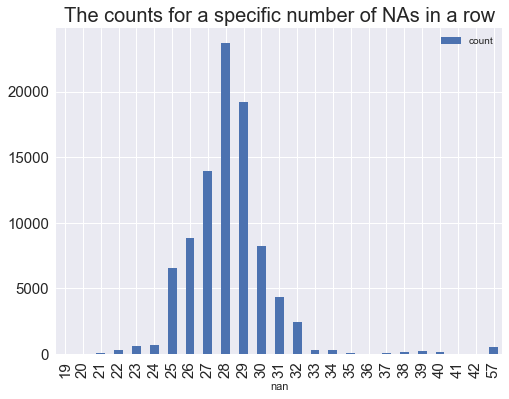

In [436]:
ax = row_nan.plot.bar(x = 'nan', y = 'count', figsize = (8,6), fontsize = 15)
ax.set_title("The counts for a specific number of NAs in a row", fontsize = 20)

In [349]:
#The rows with all nan
train_nan = train_data[train_data.isnull().sum(axis = 1) == 57]
train_nan.shape

(536, 59)

In [350]:
#remove the rows with 57 nan values
train = train_data[train_data.isnull().sum(axis = 1) != 57]
train.shape

(90275, 59)

In [351]:
#numerical variable include
train.select_dtypes(include = ['float64','int64']).columns

Index([u'logerror', u'AC_Type', u'Arch_Type', u'Basement_Area', u'Bath_Count',
       u'Bed_Count', u'Frame_Type', u'Quality_Level', u'Bed_with_bath_Count',
       u'Deck_Type', u'First_calculated_Area', u'Total_living_Area',
       u'Finished_living_Area', u'Perimeter_living_Area', u'Total_Area',
       u'First_Area', u'Base_total_Area', u'FIPS', u'FirePlace_Count',
       u'Bath_full_Count', u'Garage_Count', u'Garage_Area', u'Heat_Type',
       u'Latitude', u'Longitude', u'Lot_Area', u'Pool_Count', u'Pool_Area',
       u'Spa_Tub', u'Pool_with_Spa_Tub', u'Pool_wo_Spa_Tub', u'Land_Type',
       u'Raw_census', u'City', u'County', u'Neighborhood', u'Zipcode',
       u'Room_Count', u'Floor_Type', u'Bath_partial_Count', u'Material_Type',
       u'Unit_Count', u'Patio_yard_Area', u'Storage_yard_Area', u'Year',
       u'Story_Count', u'Tax_structure_Value', u'Tax_total_Value',
       u'Tax_assess_Year', u'Taxable_land_Value', u'Tax_Amount',
       u'Tax_delinq_Year', u'Census'],
      dtype=

In [352]:
train.select_dtypes(include = ['object']).columns

Index([u'tran_date', u'Tub_Spa_Type', u'Land_Code', u'Zone_desc',
       u'Fireplace_YN', u'Tax_delinq_YN'],
      dtype='object')

In [366]:
feature_mis = pd.DataFrame(train.isnull().sum().sort_values(),  columns = ["Nan_Count"])

ax = feature_mis.plot.barh(figsize = (18,30),fontsize = 20)
ax.set_title("The Number of Nan in original data", fontsize = 20)

In [376]:
#change year to the exact year, leave nan unchanged
train.Tax_delinq_Year.unique()
train.Tax_delinq_Year.replace([float(x) for x in range(1,18)],[x for x in range(2001,2018)],inplace = True)

train.Tax_delinq_Year.replace([99.],[1999], inplace = True)

/Users/wenqian/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [377]:
#"Y" or "N" for delinq
train.Tax_delinq_YN.unique()
train.Tax_delinq_YN.fillna("N", inplace = True)

In [378]:
train.Fireplace_YN.unique()
train.Fireplace_YN.fillna(False, inplace = True)

In [379]:
#not sure whether it is reasonalble to change to 0
train.Storage_yard_Area.unique()
train.Storage_yard_Area.fillna(0, inplace = True)

In [380]:
#change to 0
train.Patio_yard_Area.unique()
train.Patio_yard_Area.fillna(0, inplace = True)

In [381]:
#do not know how to deal
train.Unit_Count.unique()

array([   1.,   nan,    2.,    4.,    3.,    6.,  143.,   11.,    9.,
          5.,   70.])

In [382]:
train[train.Unit_Count == 143]

,logerror,tran_date,AC_Type,Arch_Type,Basement_Area,Bath_Count,Bed_Count,Frame_Type,Quality_Level,Bed_with_bath_Count,...,Story_Count,Fireplace_YN,Tax_structure_Value,Tax_total_Value,Tax_assess_Year,Taxable_land_Value,Tax_Amount,Tax_delinq_YN,Tax_delinq_Year,Census
Parcel_ID,,,,,,,,,,,,,,,,,,,,,
12984030,0.0363,2016-04-20,1.0,NaN,NaN,3.0,4.0,NaN,7.0,3.0,...,NaN,False,243856.0,397547.0,2015.0,153691.0,5392.03,N,NaN,6.037433e+13


In [383]:
train.Material_Type.unique()
train.Material_Type.fillna("Unknown", inplace = True)

In [384]:
train.Bath_partial_Count.unique()
train.Bath_partial_Count.fillna(0, inplace = True)

In [385]:
train.Floor_Type.unique()
train.Floor_Type.fillna("Unknown", inplace = True)

In [386]:
#Zipcode is object now
train.Zipcode.unique()
train.Zipcode = train.Zipcode.fillna(0).astype("int64").astype("object")

/Users/wenqian/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [387]:
train.Neighborhood.unique()
train.Neighborhood.fillna("Unknown",inplace = True)

In [388]:
train.County.unique()
train.County = train.County.astype("object")

In [389]:
#convert city to object
train.City.unique()
train.City.fillna("Unknown",inplace = True)

In [390]:
#Census tract and block ID combined - also contains blockgroup assignment by extension. Hard to group
Counter(train.Raw_census)

Counter({60371392.003001004: 26,
         60375712.001001999: 4,
         60590992.151011996: 2,
         60590320.202010997: 4,
         60374080.061006993: 1,
         60590992.401011996: 1,
         60590320.432001002: 3,
         60590992.442019992: 6,
         60590320.493018992: 9,
         60590320.572029002: 7,
         60371343.041003004: 7,
         60375505.001004003: 5,
         60374049.032001004: 1,
         60371041.081006005: 1,
         60590320.232005008: 4,
         60590992.043006994: 1,
         60377013.043008998: 1,
         60372760.001032993: 1,
         60374037.022: 6,
         60374634.003008999: 2,
         60372674.031006008: 3,
         60379106.052021995: 6,
         60379010.103015006: 4,
         60590626.125015005: 2,
         60371958.031001002: 1,
         60590992.381002001: 1,
         60590320.421007998: 2,
         60371835.102003001: 3,
         60590320.452010997: 1,
         60590219.161010996: 3,
         60372675.012005001: 4,
         6037

In [391]:
train.Zone_desc.unique()
train.Zone_desc.fillna("Unknown", inplace = True)

In [392]:
#convert Land_Type to object
train.Land_Type.unique()

array([ 261.,  266.,  265.,  246.,  263.,  269.,  248.,  247.,  267.,
        275.,  260.,   31.,  264.,   47.])

In [393]:
train.Land_Type = train.Land_Type.astype("object")

In [394]:
#0 or 1 for F and T
train.Spa_Tub.unique()
train.Spa_Tub.fillna(0, inplace = True)

In [395]:
train.Pool_with_Spa_Tub.unique()
train.Pool_with_Spa_Tub.fillna(0, inplace = True)

In [396]:
train.Pool_wo_Spa_Tub.unique()
train.Pool_wo_Spa_Tub.fillna(0, inplace = True)

In [397]:
train.Land_Code.fillna("Unknown", inplace = True)

In [398]:
#heat type instead of number. so change to object feature
train.Heat_Type.unique()
train.Heat_Type.fillna("Unknown",inplace = True)
train.Heat_Type.unique()

array([2.0, 'Unknown', 7.0, 6.0, 24.0, 13.0, 20.0, 18.0, 11.0, 1.0, 14.0,
       12.0, 10.0], dtype=object)

In [399]:
train.AC_Type.unique()
train.AC_Type.fillna("Unknown", inplace = True)
train.AC_Type.unique()

array([1.0, 'Unknown', 5.0, 13.0, 11.0, 9.0, 3.0], dtype=object)

In [400]:
train.Arch_Type.unique()
train.Arch_Type.fillna("Unknown", inplace = True)

In [401]:
#replace nan with float 0, assume it does  not have basement
train.Basement_Area.unique()
train.Basement_Area.fillna(0, inplace = True)


In [402]:
train.Frame_Type.unique()
train.Frame_Type.fillna("Unknown", inplace = True)

In [403]:
train.Quality_Level.unique() 
#this needs to be a numerical feature, leave nan as it is

array([  4.,  nan,   1.,   7.,  12.,  10.,   8.,   6.,  11.])

In [404]:
train.Bed_with_bath_Count.unique() 
#leave nan as it is

array([  2. ,   3.5,   3. ,   2.5,   4. ,   1. ,   5. ,   5.5,   1.5,
         8. ,   nan,   4.5,   9. ,   7. ,   6. ,  10. ,   6.5,   7.5,
        12. ,  11. ,  20. ,   8.5,  15. ])

In [405]:
train.Deck_Type.unique()
train.Deck_Type.fillna("Unknown",inplace = True)

In [406]:
#TWo columns are the same, drop one
train.First_calculated_Area.unique()
train.First_Area.unique()
train = train.drop("First_calculated_Area", axis = 1, errors = False)

In [407]:
train.Perimeter_living_Area.unique()

array([   nan,  1392.,  1440.,  1536.,  1344.,  1566.,  1464.,  1152.,
        1584.,  1248.,  1416.,  1056.])

In [408]:
print train.FIPS.unique()
#convert FIPS to object, since it only contains 3 kinds of codes federal use
train.FIPS = train.FIPS.astype('object')

[ 6037.  6059.  6111.]


In [409]:
#fill na with 0
print train.FirePlace_Count.unique()
train.FirePlace_Count.fillna(0, inplace = True)
print train.FirePlace_Count.unique()

[ nan   1.   2.   3.   4.   5.]
[ 0.  1.  2.  3.  4.  5.]


In [410]:
print train.Bath_full_Count.unique()
train.Bath_full_Count.fillna(0, inplace = True)
print train.Bath_full_Count.unique()

[  2.   3.   4.   1.   5.   8.  nan   9.   7.   6.  10.  12.  11.  20.  15.]
[  2.   3.   4.   1.   5.   8.   0.   9.   7.   6.  10.  12.  11.  20.  15.]


In [411]:
print train.Garage_Count.unique()
train.Garage_Count.fillna(0, inplace = True)

[ nan   2.   1.   3.   0.   4.   6.   8.   5.   7.  11.  10.  24.   9.  13.
  14.]


In [413]:
train.Garage_Area.unique()
train.Garage_Area.fillna(0, inplace = True)

In [415]:
print train.Tub_Spa_Type.unique()
train.Tub_Spa_Type.fillna(False, inplace = True)
print train.Tub_Spa_Type.unique()

['False' True]
['False' True]


In [418]:
#numerical variable include
temp = train.select_dtypes(include = ['float64','int64']).columns
print temp
print len(temp)

Index([u'logerror', u'Basement_Area', u'Bath_Count', u'Bed_Count',
       u'Quality_Level', u'Bed_with_bath_Count', u'Total_living_Area',
       u'Finished_living_Area', u'Perimeter_living_Area', u'Total_Area',
       u'First_Area', u'Base_total_Area', u'FirePlace_Count',
       u'Bath_full_Count', u'Garage_Count', u'Garage_Area', u'Latitude',
       u'Longitude', u'Lot_Area', u'Pool_Count', u'Pool_Area', u'Spa_Tub',
       u'Pool_with_Spa_Tub', u'Pool_wo_Spa_Tub', u'Raw_census', u'Room_Count',
       u'Bath_partial_Count', u'Unit_Count', u'Patio_yard_Area',
       u'Storage_yard_Area', u'Year', u'Story_Count', u'Tax_structure_Value',
       u'Tax_total_Value', u'Tax_assess_Year', u'Taxable_land_Value',
       u'Tax_Amount', u'Tax_delinq_Year', u'Census'],
      dtype='object')
39


In [419]:
temp = train.select_dtypes(include = ['object']).columns
print temp
print len(temp)

Index([u'tran_date', u'AC_Type', u'Arch_Type', u'Frame_Type', u'Deck_Type',
       u'FIPS', u'Tub_Spa_Type', u'Heat_Type', u'Land_Code', u'Land_Type',
       u'Zone_desc', u'City', u'County', u'Neighborhood', u'Zipcode',
       u'Floor_Type', u'Material_Type', u'Tax_delinq_YN'],
      dtype='object')
18


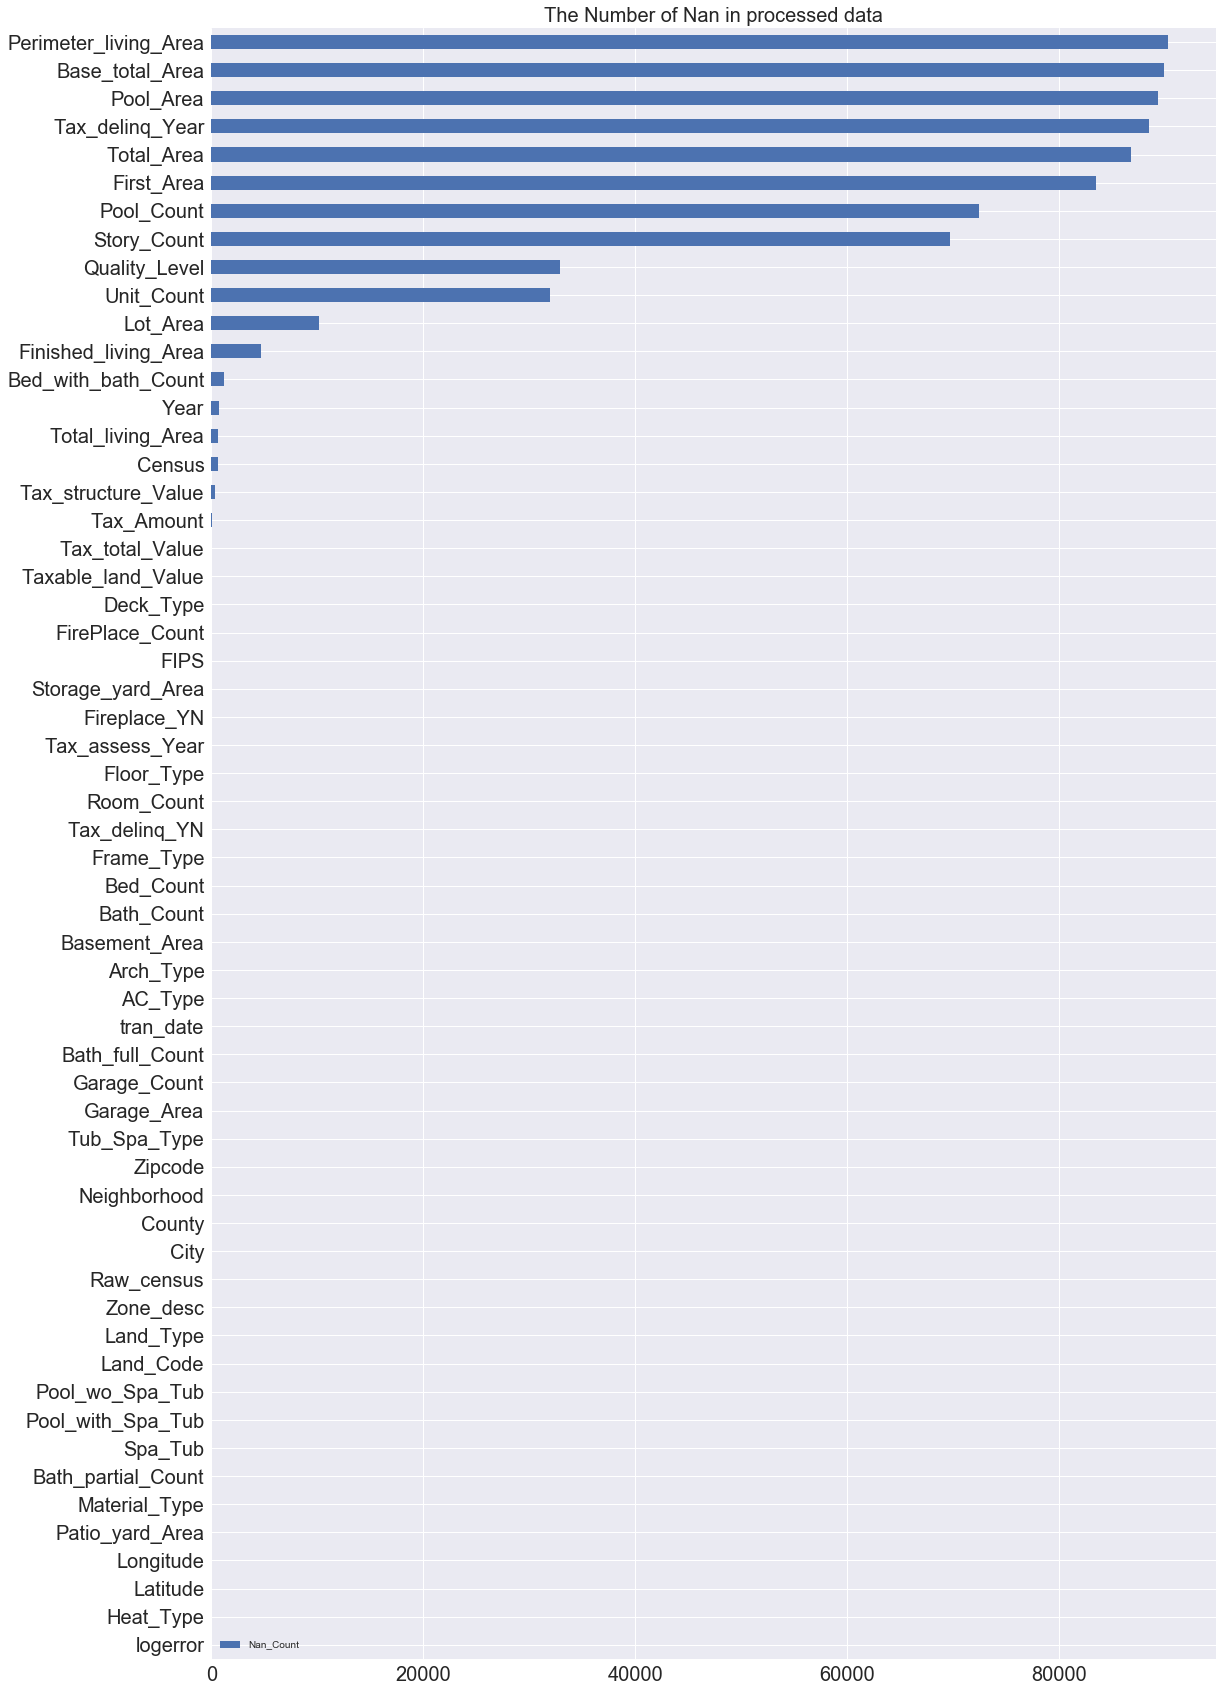

In [434]:
feature_mis = pd.DataFrame(train.isnull().sum().sort_values(),  columns = ["Nan_Count"])
ax = feature_mis.plot.barh(figsize = (18,30),fontsize = 20)
ax.set_title("The Number of Nan in processed data", fontsize = 20)

In [421]:
logerror = train["logerror"]

In [422]:
X_tr = train.drop("logerror", axis = 1)

In [423]:
X_tr.head()

,tran_date,AC_Type,Arch_Type,Basement_Area,Bath_Count,Bed_Count,Frame_Type,Quality_Level,Bed_with_bath_Count,Deck_Type,...,Story_Count,Fireplace_YN,Tax_structure_Value,Tax_total_Value,Tax_assess_Year,Taxable_land_Value,Tax_Amount,Tax_delinq_YN,Tax_delinq_Year,Census
Parcel_ID,,,,,,,,,,,,,,,,,,,,,
11016594,2016-01-01,1,Unknown,0.0,2.0,3.0,Unknown,4.0,2.0,Unknown,...,NaN,False,122754.0,360170.0,2015.0,237416.0,6735.88,N,NaN,6.037107e+13
14366692,2016-01-01,Unknown,Unknown,0.0,3.5,4.0,Unknown,NaN,3.5,Unknown,...,NaN,False,346458.0,585529.0,2015.0,239071.0,10153.02,N,NaN,NaN
12098116,2016-01-01,1,Unknown,0.0,3.0,2.0,Unknown,4.0,3.0,Unknown,...,NaN,False,61994.0,119906.0,2015.0,57912.0,11484.48,N,NaN,6.037464e+13
12643413,2016-01-02,1,Unknown,0.0,2.0,2.0,Unknown,4.0,2.0,Unknown,...,NaN,False,171518.0,244880.0,2015.0,73362.0,3048.74,N,NaN,6.037296e+13
14432541,2016-01-02,Unknown,Unknown,0.0,2.5,4.0,Unknown,NaN,2.5,Unknown,...,2.0,False,169574.0,434551.0,2015.0,264977.0,5488.96,N,NaN,6.059042e+13


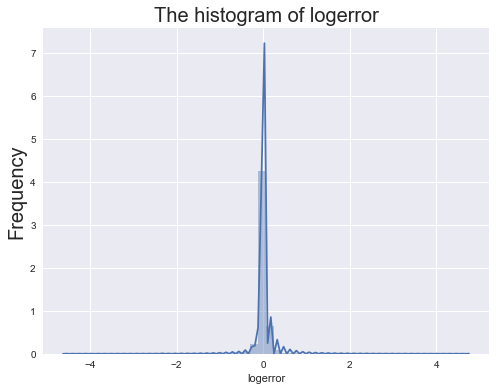

In [64]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(logerror)
ax.set_title("The histogram of logerror",fontsize = 20)
ax.set_ylabel("Frequency",fontsize = 20)

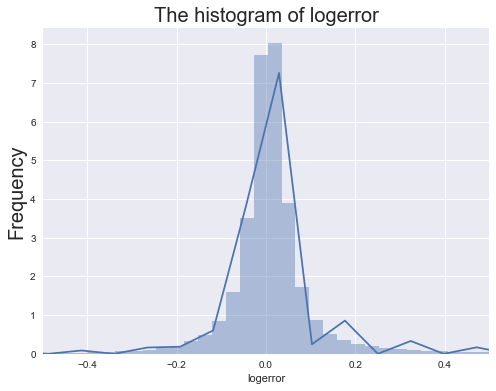

In [432]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(logerror, bins = 300)
ax.set(xlim = (-0.5, 0.5))
ax.set_title("The histogram of logerror",fontsize = 20)
ax.set_ylabel("Frequency",fontsize = 20)

Plan to do:
1. change transaction-data (object) to the day in the year (int).
2. think what we can do using location info
3. think whether we can combine some features, for pool, spa, basement, give out a grade for each standard
4. correlation between features to logerror
3. random forest, Xgboost
4. Using complete cases for ridge, lasso, svm.

